In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [206]:
df = pd.read_csv("archivo.csv")

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46327 entries, 0 to 46326
Data columns (total 41 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   LLAVE_HOGAR                        46327 non-null  int64  
 1   sexo                               46327 non-null  object 
 2   edad                               46327 non-null  int64  
 3   parentesco_jefe_hogar              46327 non-null  object 
 4   estado_civil                       39867 non-null  object 
 5   viaje_noche_fuera                  39867 non-null  object 
 6   motivo_viaje                       3898 non-null   object 
 7   compañía_viaje                     3898 non-null   object 
 8   destino_depto                      3898 non-null   object 
 9   destino_municipio                  3898 non-null   object 
 10  monto_ultimo_viaje                 3898 non-null   float64
 11  num_viajes_12_meses                3847 non-null   flo

In [208]:
#¿ si la ultima semana viajo o no? buscar cinco varialbes de no viajar o no area: departamento de la persona

In [209]:
#40, 5, 26, 4, 25, 22 

In [210]:
df = df[["parentesco_jefe_hogar", "estado_civil","viaje_noche_fuera","nivel_educativo","edad","estrato"]]

In [211]:
df

,parentesco_jefe_hogar,estado_civil,viaje_noche_fuera,nivel_educativo,edad,estrato
0,jefe_hogar,soltero,no,basica_primaria,56,1.0
1,hijo,soltero,no,media,25,1.0
2,nieto,NaN,NaN,NaN,1,1.0
3,jefe_hogar,separado_divorciado,no,basica_secundaria,39,1.0
4,hijo,soltero,no,basica_secundaria,14,1.0
...,...,...,...,...,...,...
46322,hijo,soltero,no,media,16,3.0
46323,otro_pariente,viudo,no,basica_secundaria,76,3.0
46324,jefe_hogar,casado,si,media,61,2.0
46325,pareja,casado,si,superior_universitaria,60,2.0


In [212]:
df = df[df["parentesco_jefe_hogar"] == "jefe_hogar"]

In [213]:
df = df[~df["viaje_noche_fuera"].isna()]

In [214]:
df = df[df["estrato"] < 9.0]

In [215]:
df["viaje_noche_fuera"].value_counts(dropna=False)

no    12349
si     1667
Name: viaje_noche_fuera, dtype: int64

In [216]:
df["viaje_noche_fuera"].value_counts(dropna=False)

no    12349
si     1667
Name: viaje_noche_fuera, dtype: int64

In [217]:
df

,parentesco_jefe_hogar,estado_civil,viaje_noche_fuera,nivel_educativo,edad,estrato
0,jefe_hogar,soltero,no,basica_primaria,56,1.0
3,jefe_hogar,separado_divorciado,no,basica_secundaria,39,1.0
6,jefe_hogar,viudo,no,basica_primaria,68,1.0
7,jefe_hogar,pareja_no_union_libre,no,basica_primaria,34,1.0
10,jefe_hogar,pareja_union_libre,no,media,25,1.0
...,...,...,...,...,...,...
46305,jefe_hogar,casado,no,superior_universitaria,63,2.0
46309,jefe_hogar,separado_divorciado,no,superior_universitaria,66,1.0
46316,jefe_hogar,casado,no,media,71,4.0
46320,jefe_hogar,casado,no,media,50,3.0


In [218]:
pd.crosstab(df["viaje_noche_fuera"], df["estrato"], normalize=True)

estrato,0.0,1.0,2.0,3.0,4.0,5.0,6.0
viaje_noche_fuera,,,,,,,
no,0.003496,0.250428,0.319064,0.224600,0.056792,0.014697,0.011986
si,0.000071,0.019192,0.033818,0.041025,0.013342,0.006064,0.005422


In [219]:
pd.crosstab(df["viaje_noche_fuera"], df["estado_civil"], normalize=True)

estado_civil,casado,pareja_no_union_libre,pareja_union_libre,separado_divorciado,soltero,viudo
viaje_noche_fuera,,,,,,
no,0.241866,0.014483,0.249643,0.172018,0.117865,0.085188
si,0.036815,0.002854,0.026969,0.019834,0.024401,0.008062


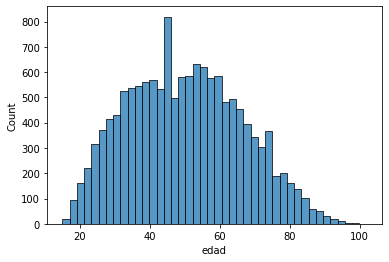

In [220]:
sns.histplot(x=df["edad"])

In [221]:
df["edad"].describe()

count    14016.000000
mean        50.040739
std         16.337337
min         15.000000
25%         37.000000
50%         50.000000
75%         62.000000
max        102.000000
Name: edad, dtype: float64

In [222]:
mode(df["edad"])

ModeResult(mode=array([40]), count=array([333]))

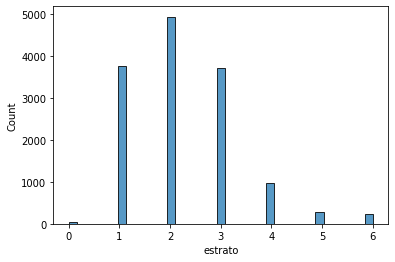

In [223]:
sns.histplot(x=df["estrato"])

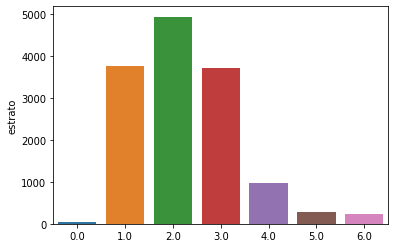

In [224]:
sns.barplot(x=df["estrato"].value_counts().index, y=df["estrato"].value_counts())

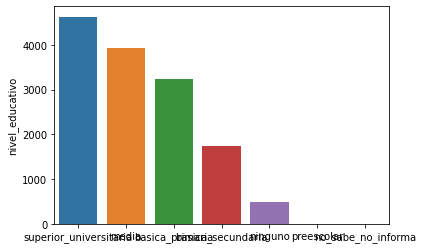

In [225]:
sns.barplot(x=df["nivel_educativo"].value_counts().index, y=df["nivel_educativo"].value_counts())

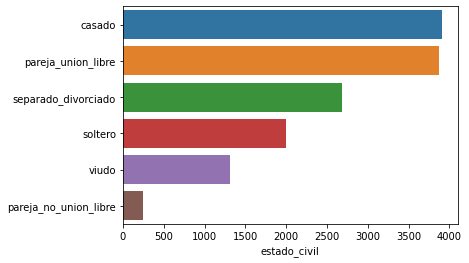

In [226]:
sns.barplot(y=df["estado_civil"].value_counts().index, x=df["estado_civil"].value_counts(),orient='h')
#plt.xticks(rotation=90)

In [227]:
df["viaje_noche_fuera"]=df["viaje_noche_fuera"].replace({"si": 1, "no": 0})

In [228]:
df.drop(columns="parentesco_jefe_hogar",inplace=True)

In [229]:
df = df[df["nivel_educativo"]!= "no_sabe_no_informa"]

In [230]:
df = pd.get_dummies(df, drop_first=True)

In [232]:
X = df.copy()
y = X.pop("viaje_noche_fuera")
X = sm.add_constant(X)
model = sm.OLS(y,X)
reg = model.fit()
reg.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      viaje_noche_fuera   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     52.20
Date:                Thu, 21 Apr 2022   Prob (F-statistic):          1.78e-123
Time:                        22:46:47   Log-Likelihood:                -3773.1
No. Observations:               14012   AIC:                             7572.
Df Residuals:                   13999   BIC:                             7670.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      0.0844      0.015      5.694      0.000       0.055       0.113
edad                                      -0.0015      0.000     -6.850      0.000      -0.002      -0.001
estrato                                    0.0395      0.003     14.316      0.000       0.034       0.045
estado_civil_pareja_no_union_libre         0.0145      0.021      0.679      0.497      -0.027       0.056
estado_civil_pareja_union_libre           -0.0169      0.008     -2.224      0.026      -0.032      -0.002
estado_civil_separado_divorciado          -0.0102      0.008     -1.269      0.205      -0.026       0.006
estado_civil_soltero                       0.0170      0.009      1.881      0.060      -0.001       0.035
estado_civil_viudo                        -0.0035      0.011     -0.330      0.741      -0.024       0.017
nivel_educativo_basica_secundaria         -0.0025      0.010     -0.260      0.795      -0.021       0.016
nivel_educativo_media                      0.0074      0.008      0.902      0.367      -0.009       0.023
nivel_educativo_ninguno                    0.0091      0.016      0.587      0.557      -0.021       0.040
nivel_educativo_preescolar                -0.0239      0.130     -0.184      0.854      -0.278       0.230
nivel_educativo_superior_universitaria     0.0608      0.009      7.096      0.000       0.044       0.078
==============================================================================
Omnibus:                     5709.982   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17790.521
Skew:                           2.211   Prob(JB):                         0.00
Kurtosis:                       6.303   Cond. No.                     2.55e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.55e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [235]:
X = df[["edad", "estrato", "estado_civil_pareja_union_libre", "nivel_educativo_superior_universitaria", "viaje_noche_fuera"]].copy()
y = X.pop("viaje_noche_fuera")
X = sm.add_constant(X)
model = sm.OLS(y,X)
reg = model.fit()
reg.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      viaje_noche_fuera   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     154.1
Date:                Thu, 21 Apr 2022   Prob (F-statistic):          3.20e-129
Time:                        22:54:02   Log-Likelihood:                -3778.1
No. Observations:               14012   AIC:                             7566.
Df Residuals:                   14007   BIC:                             7604.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      0.0953      0.011      8.647      0.000       0.074       0.117
edad                                      -0.0016      0.000     -9.157      0.000      -0.002      -0.001
estrato                                    0.0406      0.003     15.208      0.000       0.035       0.046
estado_civil_pareja_union_libre           -0.0184      0.006     -2.922      0.003      -0.031      -0.006
nivel_educativo_superior_universitaria     0.0577      0.006      9.052      0.000       0.045       0.070
==============================================================================
Omnibus:                     5715.259   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17819.795
Skew:                           2.213   Prob(JB):                         0.00
Kurtosis:                       6.305   Cond. No.                         229.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""